In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-07-21 17:54:16 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-07-21 17:54:16 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-07-21 17:54:16 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

[2025-07-21 17:54:19,282] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-07-21 17:54:19 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpoaocfdez/test.c -o /tmp/tmpoaocfdez/test.o
2025-07-21 17:54:19 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpoaocfdez/test.o -laio -o /tmp/tmpoaocfdez/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-21 17:54:19 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpl4qc51nq/test.c -o /tmp/tmpl4qc51nq/test.o
2025-07-21 17:54:19 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpl4qc51nq/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmpl4qc51nq/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-21 17:54:20 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-21 17:54:20 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-21 17:54:21 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-07-21 17:54:21 wandb.docker.auth DEBUG    No config file found


In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-07-21 17:54:21 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-07-21 17:54:21 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-07-21 17:54:21 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-07-21 17:54:21 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-21 17:55:10 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-07-21 17:55:11 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "64"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001",
    model_key.split("/")[-1],
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas["model<>layers<>10<>mlp<>gate_proj"]
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-07-21 17:55:24 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-21 17:55:24 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-21 17:55:25 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-21 17:55:25 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-21 17:55:25 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-21 17:55:25 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-21 17:55:25 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
202

In [8]:
# mt.tokenizer(
#     " " + "Brad Pitt", return_tensors="pt", add_special_tokens=False
# ).input_ids[0][0].item()

In [9]:
from src.selection.data  import load_people_by_category

people_by_category = load_people_by_category(tokenizer = mt.tokenizer)

2025-07-21 17:55:29 src.selection.data INFO     Loaded 16 categories


In [10]:
from src.selection.data import SelectionSample, get_random_sample

sample = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=5,
    get_alt_obj=True,
    category="actor",
    obj_idx=3,
    filter_by_lm_prediction=True,
)
print(sample)
print(sample.prompt, " >> ", f'"{sample.obj}"')
sample.prediction

Chris Hemsworth -> Brad Pitt (3): ['Anderson Cooper', 'Rory McIlroy', 'Manny Pacquiao', 'Brad Pitt', 'Lamar Jackson', 'Son Heung-min']
Which person from the following list has the profession in common with Chris Hemsworth?
Options: Anderson Cooper, Rory McIlroy, Manny Pacquiao, Brad Pitt, Lamar Jackson, Son Heung-min
Ans:  >>  "Brad Pitt"


[PredictedToken(token=' Brad', prob=0.828125, logit=20.25, token_id=17478, metadata=None),
 PredictedToken(token=' The', prob=0.052978515625, logit=17.5, token_id=578, metadata=None),
 PredictedToken(token=' Chris', prob=0.041259765625, logit=17.25, token_id=11517, metadata=None),
 PredictedToken(token=' None', prob=0.0052490234375, logit=15.1875, token_id=2290, metadata=None),
 PredictedToken(token=' ', prob=0.0052490234375, logit=15.1875, token_id=220, metadata=None)]

In [11]:
sample.detensorize()
with open("sample.json", "w") as f:
    json.dump(sample.to_dict(), f, indent=2)

In [12]:
with open("sample.json", "r") as f:
    data = json.load(f)

# print(type(data[]))
sample_ld = SelectionSample.from_dict(data)

In [13]:
# sample_ld.metadata["tokenized"]

In [14]:
list(people_by_category.keys())

['actor',
 'singer',
 'comedian',
 'director',
 'basketball player',
 'football player',
 'soccer player',
 'tennis player',
 'golfer',
 'boxer',
 'news anchor',
 'journalist',
 'author',
 'fashion designer',
 'entrepreneur',
 'politician']

## Patching

### Testing

In [36]:
WINDOW_SPEC = {
    mt.layer_name_format: 1,
    mt.mlp_module_name_format: 5,
    mt.attn_module_name_format: 5,
}
module_name_format = mt.layer_name_format
# module_name_format = mt.mlp_module_name_format
# module_name_format = mt.attn_module_name_format

In [37]:
from src.functional import generate_with_patch
import random

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

# pivot_subj = "Celine Dion"
# entity_list = ["Ryan Reynolds", "Claude Monet", "Albert Einstein", "Taylor Swift", "Pablo Picasso", "Barack Obama", "J.K. Rowling", "Pierre Dubois"]

# pivot_subj = "Jim Henson"
# entity_list = [
#     "Celine Dion",
#     "Taylor Swift",
#     "Ryan Reynolds",
#     "Claude Monet",
#     "Albert Einstein",
#     "Pablo Picasso",
#     "Bil Baird",
#     "Barack Obama",
#     "J.K. Rowling",
#     "Pierre Dubois",
#     "Sachin Tendulkar",
#     "Hugh Jackman",
#     "Jackie Chan",
#     "Jet Li",
#     "Diego Maradona",
#     "Lionel Messi",
#     "Frida Kahlo",
#     "Diego Rivera",
# ]

# patch_subj = "Justin Trudeau"
# patch_obj = "Barack Obama"
# patch_obj_pos = 2
# patch_subj_distractor = "Emmanuel Macron"
# patch_obj, patch_subj_distractor = patch_subj_distractor, patch_obj

# patch_subj = "Hugh Jackman"
# patch_subj = "Carl Sagan"
# patch_subj = "Ricky Ponting"
# patch_subj = "George R. R. Martin"

# patch_subj = "Celine Dion"
# patch_obj = "Taylor Swift"
# patch_subj_distractor = "Adele Laurie Blue Adkins"

# patch_distractors = [
#     "Robin Hobb",
#     "Michael Jordan",
#     "Tom Cruise",
#     "Albert Einstein",
#     "Brian Lara",
# ]

######################################################################
patch_prof = "actor"
patch_obj_pos = 1
n_distractors = 5
######################################################################

# patch_subj = random.choice(people_by_prof_set[patch_prof].values)
# patch_obj = random.choice(
#     (people_by_prof_set[patch_prof] - KeyedSet([patch_subj])).values
# )
# patch_subj_distractor = random.choice(
#     (people_by_prof_set[patch_prof] - KeyedSet([patch_obj, patch_subj])).values
# )


# patch_distractors = []
# other_profs = random.choices(
#     list(set(people_by_prof.keys()) - {patch_prof}), k=n_distractors
# )

# for prof in other_profs:
#     patch_distractors.append(random.choice(people_by_prof[prof]))

# patch_list = (
#     patch_distractors[:patch_obj_pos] + [patch_obj] + patch_distractors[patch_obj_pos:]
# )
# obj_corrupt = get_first_token_id(patch_obj)
# print(f'{obj_corrupt=} >> "{mt.tokenizer.decode(obj_corrupt)}", {patch_obj=}')

# obj_patch_subj = get_first_token_id(patch_subj_distractor)
# print(f'{obj_patch_subj=} >> "{mt.tokenizer.decode(obj_patch_subj)}", {patch_subj_distractor=}')

# patch_prompt = prompt_template.format(patch_subj, ", ".join(patch_list))
# print(f'"{patch_prompt}"')

patch_sample = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=True,
    category=patch_prof,
    obj_idx=patch_obj_pos,
)

print(patch_sample)
print(patch_sample.prompt)

patch_gen = generate_with_patch(
    mt=mt,
    inputs=patch_sample.prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0]
print(f"{patch_gen}")

Samuel L. Jackson -> Julia Roberts (1): ['Manny Pacquiao', 'Julia Roberts', 'Paulo Dybala', 'Hideki Matsuyama', 'Derrick Henry', 'The Weeknd']
Which person from the following list has the profession in common with Samuel L. Jackson?
Options: Manny Pacquiao, Julia Roberts, Paulo Dybala, Hideki Matsuyama, Derrick Henry, The Weeknd
Ans:


/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


 Julia Roberts
Explanation: Samuel L. Jackson is an actor. Julia Roberts is also an actor. Therefore, Julia Roberts has the profession in common with


In [38]:
patch_sample.prediction

[PredictedToken(token=' Julia', prob=0.890625, logit=20.5, token_id=40394, metadata=None),
 PredictedToken(token=' The', prob=0.0390625, logit=17.375, token_id=578, metadata=None),
 PredictedToken(token=' J', prob=0.0184326171875, logit=16.625, token_id=622, metadata=None),
 PredictedToken(token=' Samuel', prob=0.005645751953125, logit=15.4375, token_id=33007, metadata=None),
 PredictedToken(token=' Manny', prob=0.00439453125, logit=15.1875, token_id=95255, metadata=None)]

In [40]:
from src.tokens import find_token_range

patch_pred_range = find_token_range(
    string=patch_sample.prompt,
    substring="Ans:",
    tokenizer=mt,
)
print(
    f"{patch_pred_range=} | \"{mt.tokenizer.decode(patch_sample.metadata['tokenized']['input_ids'][0][range(*patch_pred_range)])}\""
)

patch_pred_range=(45, 48) | "
Ans:"


In [41]:
from src.functional import get_hs, interpret_logits
from src.utils.typing import TokenizerOutput
from itertools import product

modules = [module_name_format.format(layer_idx) for layer_idx in range(len(mt.layer_names))]
locations = list(product(modules, list(range(*patch_pred_range))))
logit_location = (mt.lm_head_name, -1)


patch_hs = get_hs(
    mt = mt,
    input=TokenizerOutput(data = patch_sample.metadata["tokenized"]),
    locations=locations + [logit_location],
    return_dict=True
)

logit = patch_hs[logit_location]
pred = interpret_logits(
    logits = logit,
    tokenizer=mt
)
pred

[PredictedToken(token=' Julia', prob=0.890625, logit=20.5, token_id=40394, metadata=None),
 PredictedToken(token=' The', prob=0.0390625, logit=17.375, token_id=578, metadata=None),
 PredictedToken(token=' J', prob=0.0184326171875, logit=16.625, token_id=622, metadata=None),
 PredictedToken(token=' Samuel', prob=0.005645751953125, logit=15.4375, token_id=33007, metadata=None),
 PredictedToken(token=' Manny', prob=0.00439453125, logit=15.1875, token_id=95255, metadata=None)]

In [42]:
patch_sample.metadata["alt_obj"]

('Johnny Depp', 32980)

In [43]:
##############################################################
clean_prof = "tennis player"
clean_obj_pos = 5
patch_type_pos = random.choice(
    list(set(list(range(0, n_distractors))) - {clean_obj_pos, patch_obj_pos})
)
##############################################################

clean_sample = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=False,
    category=clean_prof,
    obj_idx=clean_obj_pos,
    filter_by_lm_prediction=True,
    exclude_objs=[patch_sample.obj, patch_sample.metadata["alt_obj"][0]],
    exclude_distractor_categories=[patch_prof, "singer"],
    insert_distractor=[(patch_sample.metadata["alt_obj"][0], patch_type_pos)],
)

print(clean_sample)
print(clean_sample.prompt)
clean_sample.prediction

Naomi Osaka -> Elena Rybakina (5): ['Neymar', 'Aziz Ansari', 'Johnny Depp', 'Bari Weiss', 'Brandon Sanderson', 'Elena Rybakina']
Which person from the following list has the profession in common with Naomi Osaka?
Options: Neymar, Aziz Ansari, Johnny Depp, Bari Weiss, Brandon Sanderson, Elena Rybakina
Ans:


[PredictedToken(token=' Elena', prob=0.65625, logit=19.125, token_id=69675, metadata=None),
 PredictedToken(token=' Naomi', prob=0.0888671875, logit=17.125, token_id=78822, metadata=None),
 PredictedToken(token=' None', prob=0.061279296875, logit=16.75, token_id=2290, metadata=None),
 PredictedToken(token=' The', prob=0.047607421875, logit=16.5, token_id=578, metadata=None),
 PredictedToken(token=' B', prob=0.0164794921875, logit=15.4375, token_id=426, metadata=None)]

In [45]:
clean_pred_range = find_token_range(
    string=clean_sample.prompt,
    substring="Ans:",
    tokenizer=mt,
)
print(
    f"{clean_pred_range=} | \"{mt.tokenizer.decode(clean_sample.metadata['tokenized']['input_ids'][0][range(*clean_pred_range)])}\""
)

clean_pred_range=(42, 45) | "
Ans:"


In [46]:
from src.selection.utils import get_first_token_id

obj_corrupt = patch_sample.obj
obj_clean = clean_sample.obj
obj_pointer = clean_sample.options[patch_obj_pos]
obj_patch_type = patch_sample.metadata["alt_obj"][0]
obj_rand = random.choice(
    list(set(clean_sample.options) - {obj_clean, obj_pointer, obj_corrupt})
)

obj_track = {
    "corrupt": obj_corrupt,
    "clean": obj_clean,
    "pointer": obj_pointer,
    "patch_type": obj_patch_type,
    "rand": obj_rand,
    "none": "None"
}

for obj_type in obj_track:
    obj = obj_track[obj_type]
    obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
    obj_track[obj_type] = {
        "id": obj_id,
        "token": mt.tokenizer.decode(obj_id),
        "name": obj,
    }

obj_track

{'corrupt': {'id': 40394, 'token': ' Julia', 'name': 'Julia Roberts'},
 'clean': {'id': 69675, 'token': ' Elena', 'name': 'Elena Rybakina'},
 'pointer': {'id': 15757, 'token': ' Az', 'name': 'Aziz Ansari'},
 'patch_type': {'id': 32980, 'token': ' Johnny', 'name': 'Johnny Depp'},
 'rand': {'id': 32866, 'token': ' Brandon', 'name': 'Brandon Sanderson'},
 'none': {'id': 2290, 'token': ' None', 'name': 'None'}}

In [48]:
from src.functional import PatchSpec
from src.trace import get_window


clean_tokenized = TokenizerOutput(
    data=clean_sample.metadata["tokenized"],
)

interested_tokens = [obj["id"] for obj in obj_track.values()]

patching_results = {}
for layer_idx in range(len(mt.layer_names)):
    patches = []
    for patch_idx, clean_idx in zip(range(*patch_pred_range), range(*clean_pred_range)):
        patches.extend(
            [
                PatchSpec(
                    location=(module_name, clean_idx),
                    patch=patch_hs[(module_name, patch_idx)],
                    strategy="replace",
                )
                for module_name in get_window(
                    module_name_format,
                    idx=layer_idx,
                    window_size=WINDOW_SPEC[module_name_format],
                    n_layer=mt.n_layer,
                )
            ]
        )
    int_logit = get_hs(
        mt=mt,
        input=clean_tokenized,
        patches=patches,
        locations=[logit_location],
        return_dict=False,
    ).squeeze(0)

    pred, track = interpret_logits(
        logits=int_logit,
        tokenizer=mt,
        interested_tokens=interested_tokens,
    )
    patching_results[module_name_format.format(layer_idx)] = {
        "pred": pred,
        "track": track,
    }
    print(
        f"{module_name_format.format(layer_idx)}: {[str(p) for p in pred]}, | track: {track}"
    )

model.layers.0: ['" Elena"[69675] (p=0.656, logit=19.125)', '" Naomi"[78822] (p=0.089, logit=17.125)', '" None"[2290] (p=0.061, logit=16.750)', '" The"[578] (p=0.048, logit=16.500)', '" B"[426] (p=0.017, logit=15.500)'], | track: {69675: (1, PredictedToken(token=' Elena', prob=0.65625, logit=19.125, token_id=69675, metadata=None)), 2290: (3, PredictedToken(token=' None', prob=0.06103515625, logit=16.75, token_id=2290, metadata=None)), 32866: (6, PredictedToken(token=' Brandon', prob=0.01544189453125, logit=15.375, token_id=32866, metadata=None)), 15757: (12, PredictedToken(token=' Az', prob=0.004150390625, logit=14.0625, token_id=15757, metadata=None)), 32980: (94, PredictedToken(token=' Johnny', prob=0.000110626220703125, logit=10.4375, token_id=32980, metadata=None)), 40394: (394, PredictedToken(token=' Julia', prob=1.3232231140136719e-05, logit=8.3125, token_id=40394, metadata=None))}
model.layers.1: ['" Elena"[69675] (p=0.680, logit=19.125)', '" Naomi"[78822] (p=0.082, logit=17.000

In [49]:
track

{40394: (1,
  PredictedToken(token=' Julia', prob=0.890625, logit=20.5, token_id=40394, metadata=None)),
 2290: (6,
  PredictedToken(token=' None', prob=0.004119873046875, logit=15.125, token_id=2290, metadata=None)),
 32980: (242,
  PredictedToken(token=' Johnny', prob=9.59634780883789e-06, logit=9.0625, token_id=32980, metadata=None)),
 32866: (1576,
  PredictedToken(token=' Brandon', prob=5.587935447692871e-07, logit=6.21875, token_id=32866, metadata=None)),
 69675: (3553,
  PredictedToken(token=' Elena', prob=1.816079020500183e-07, logit=5.09375, token_id=69675, metadata=None)),
 15757: (4741,
  PredictedToken(token=' Az', prob=1.1688098311424255e-07, logit=4.65625, token_id=15757, metadata=None))}

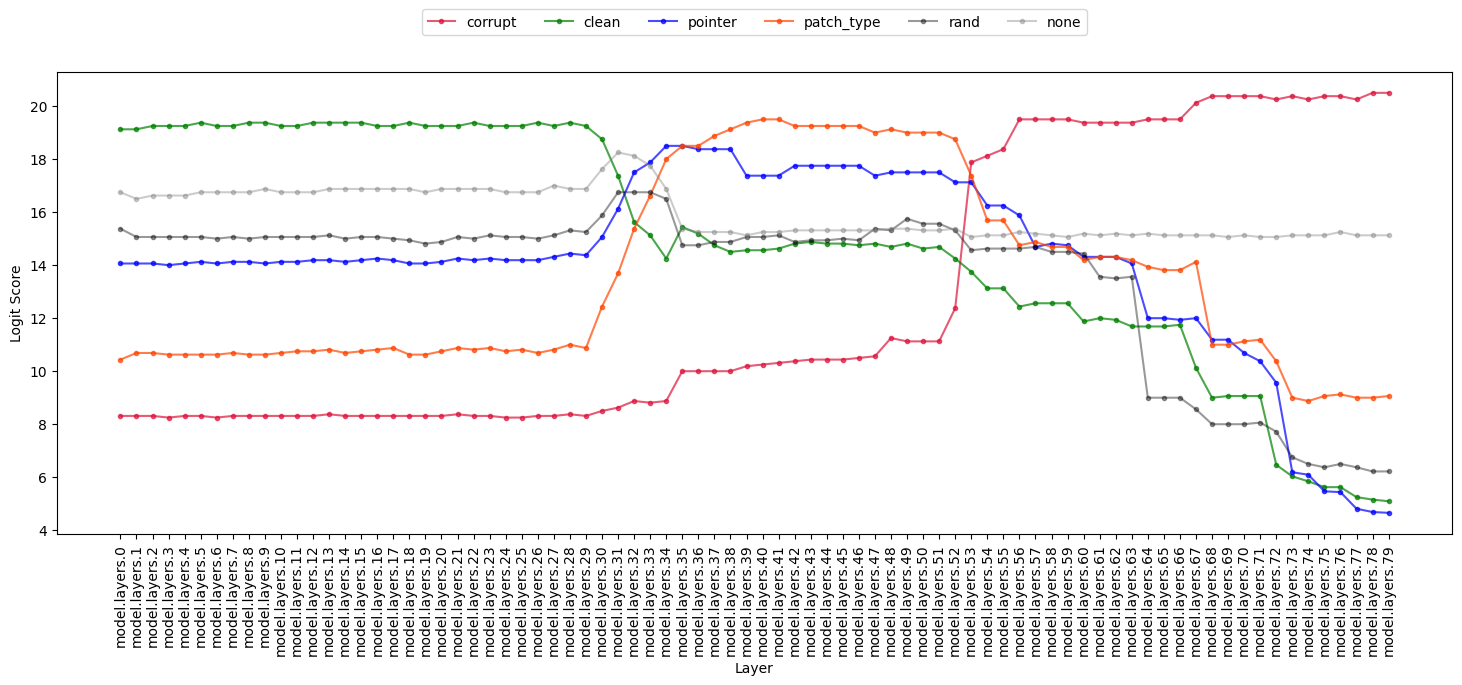

In [52]:
from matplotlib import pyplot as plt

METRIC = "logit"
scores = {obj_type: [] for obj_type in obj_track.keys()}
colors = {
    "corrupt": "crimson",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "#FF4500",
    "rand": "black",
    "none": "gray",
}

for layer_idx, result in patching_results.items():
    track = result["track"]
    for obj_type in obj_track.keys():
        tok_id = obj_track[obj_type]["id"]
        s = getattr(track[tok_id][1], METRIC)
        scores[obj_type].append(s)

xkeys = list(patching_results.keys())
plt.figure(figsize=(18, 6))

for key in scores:
    plt.plot(
        xkeys,
        scores[key],
        label=key,
        marker="o",
        markersize=3,
        color=colors[key],
        alpha=0.7 if key not in ["none", "rand"] else 0.4,
    )


plt.xticks(rotation=90)
plt.xlabel("Layer")
plt.ylabel("Logit Score")

plt.legend(ncols=len(scores), loc="upper center", bbox_to_anchor=(0.5, 1.15))

plt.show()

In [ ]:
# **scale up**
from src.selection.data import (
    SelectionPatchingResult,
    ObjectwiseResult,
    LayerwiseResult,
)
from src.utils import experiment_utils

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

##################################################################################################
N_RUNS = 100
N_DISTRACTORS = 5
SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "predictive_tokens",
)

FILE_NAME_SPEC = {
    mt.layer_name_format: "residual.json",
    mt.mlp_module_name_format: "mlp.json",
    mt.attn_module_name_format: "attn.json",
}

WINDOW_SPEC = {
    mt.layer_name_format: 1,
    mt.mlp_module_name_format: 5,
    mt.attn_module_name_format: 9,
}
module_name_format = mt.layer_name_format
# module_name_format = mt.mlp_module_name_format
# module_name_format = mt.attn_module_name_format

save_step = 50

locations = [
    (module_name_format.format(layer_idx), -1)
    for layer_idx in range(len(mt.layer_names))
]
logit_location = (mt.lm_head_name, -1)
layer_step = 1
##################################################################################################

experiment_utils.set_seed(123456)

os.makedirs(SAVE_DIR, exist_ok=True)
run_idx = 0
patching_results = []

while run_idx < N_RUNS:
    run_idx += 1
    logger.info("#" * 100)
    logger.info(f"Run {run_idx}/{N_RUNS}")

    # select the patch sample
    patch_prof = random.choice(list(people_by_category.keys()))
    patch_obj_pos = random.choice(list(range(N_DISTRACTORS)))
    logger.info(f"patch_prof={patch_prof}, patch_obj_pos={patch_obj_pos}")

    # TODO(arnab): Check accuracy with the object as well.
    patch_sample = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=True,
        category=patch_prof,
        obj_idx=patch_obj_pos,
    )
    logger.info(f"patch_sample={str(patch_sample)}")
    logger.info(f"patch predictions={[str(pred) for pred in patch_sample.prediction]}")
    patch_pred_range = find_token_range(
        string=patch_sample.prompt,
        substring="Ans:",
        tokenizer=mt,
    )
    logger.info(
        f"{patch_pred_range=} | \"{mt.tokenizer.decode(patch_sample.metadata['tokenized']['input_ids'][0][range(*patch_pred_range)])}\""
    )
    logger.info("-" * 50)

    # cache states
    modules = [
        module_name_format.format(layer_idx) for layer_idx in range(len(mt.layer_names))
    ]
    locations = list(product(modules, list(range(*patch_pred_range))))
    logit_location = (mt.lm_head_name, -1)
    patch_hs = get_hs(
        mt=mt,
        input=TokenizerOutput(data=patch_sample.metadata["tokenized"]),
        locations=locations,  # + [logit_location],
        return_dict=True,
    )

    # select the clean sample
    clean_prof = random.choice(list(set(people_by_category.keys()) - {patch_prof}))
    clean_obj_pos = random.choice(
        [idx for idx in range(N_DISTRACTORS) if idx != patch_obj_pos]
    )
    patch_type_pos = random.choice(
        list(set(list(range(0, N_DISTRACTORS))) - {clean_obj_pos, patch_obj_pos})
    )
    logger.info(f"clean_prof={clean_prof}, clean_obj_pos={clean_obj_pos}")

    logger.debug(
        f"patch_type_pos={patch_type_pos}, patch_obj_pos={patch_obj_pos}, clean_obj_pos={clean_obj_pos}"
    )

    clean_sample = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=False,
        category=clean_prof,
        obj_idx=clean_obj_pos,
        filter_by_lm_prediction=True,
        exclude_objs=[patch_sample.obj, patch_sample.metadata["alt_obj"][0]],
        exclude_distractor_categories=[patch_prof],
        insert_distractor=[(patch_sample.metadata["alt_obj"][0], patch_type_pos)],
    )
    logger.info(f"clean_sample={str(clean_sample)}")
    logger.info(f"clean predictions={[str(pred) for pred in clean_sample.prediction]}")
    clean_pred_range = find_token_range(
        string=clean_sample.prompt,
        substring="Ans:",
        tokenizer=mt,
    )
    logger.info(
        f"{clean_pred_range=} | \"{mt.tokenizer.decode(clean_sample.metadata['tokenized']['input_ids'][0][range(*clean_pred_range)])}\""
    )
    logger.info("-" * 50)

    # do the interventions
    clean_tokenized = TokenizerOutput(
        data=clean_sample.metadata["tokenized"],
    )

    obj_corrupt = patch_sample.obj
    obj_clean = clean_sample.obj
    obj_pointer = clean_sample.options[patch_obj_pos]
    obj_patch_type = patch_sample.metadata["alt_obj"][0]
    obj_rand = random.choice(
        list(
            set(clean_sample.options)
            - {obj_clean, obj_pointer, obj_corrupt, obj_patch_type}
        )
    )

    obj_track = {
        "corrupt": obj_corrupt,
        "clean": obj_clean,
        "pointer": obj_pointer,
        "patch_type": obj_patch_type,
        "rand": obj_rand,
        "none": "None",
    }

    for obj_type in obj_track:
        obj = obj_track[obj_type]
        obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
        obj_track[obj_type] = {
            "id": obj_id,
            "token": mt.tokenizer.decode(obj_id),
            "name": obj,
        }

    interested_tokens = [obj["id"] for obj in obj_track.values()]

    layerwise_patching_results = {}
    for layer_idx in range(0, len(mt.layer_names), layer_step):
        patches = []
        for patch_idx, clean_idx in zip(
            range(*patch_pred_range), range(*clean_pred_range)
        ):
            patches.extend(
                [
                    PatchSpec(
                        location=(module_name, clean_idx),
                        patch=patch_hs[(module_name, patch_idx)],
                        strategy="replace",
                    )
                    for module_name in get_window(
                        module_name_format,
                        idx=layer_idx,
                        window_size=WINDOW_SPEC[module_name_format],
                        n_layer=mt.n_layer,
                    )
                ]
            )
        int_logit = get_hs(
            mt=mt,
            input=clean_tokenized,
            patches=patches,
            locations=[logit_location],
            return_dict=False,
        ).squeeze(0)

        pred, track = interpret_logits(
            logits=int_logit,
            tokenizer=mt,
            interested_tokens=interested_tokens,
        )
        objectwise_result = {}
        for obj_type in obj_track:
            obj_res = track[obj_track[obj_type]["id"]]
            objectwise_result[obj_type] = ObjectwiseResult(
                rank=obj_res[0], pred=obj_res[1]
            )
        layerwise_patching_results[module_name_format.format(layer_idx)] = (
            LayerwiseResult(predictions=pred, objs=objectwise_result)
        )
        print(f"{module_name_format.format(layer_idx)}: {[str(p) for p in pred]} | track: {track}")

    patch_sample.detensorize()
    clean_sample.detensorize()

    patching_results.append(
        SelectionPatchingResult(
            patch_sample=patch_sample,
            clean_sample=clean_sample,
            results=layerwise_patching_results,
        )
    )

    if run_idx % save_step == 0 or run_idx == N_RUNS:
        save_file = os.path.join(
            SAVE_DIR,
            f"{FILE_NAME_SPEC[module_name_format]}",
        )

        with open(save_file, "w") as f:
            json.dump(
                [run.to_dict() for run in patching_results],
                f,
                indent=2,
            )

    logger.info("#" * 100)

2025-07-21 18:22:37 src.utils.experiment_utils INFO     setting all seeds to 123456
2025-07-21 18:22:37 __main__ INFO     ####################################################################################################
2025-07-21 18:22:37 __main__ INFO     Run 1/10
2025-07-21 18:22:37 __main__ INFO     patch_prof=boxer, patch_obj_pos=0
2025-07-21 18:22:38 __main__ INFO     patch_sample=Gervonta Davis -> Caleb Plant (0): ['Caleb Plant', 'Justin Jefferson', 'Glenn Greenwald', 'Clint Eastwood', 'Wolf Blitzer', 'James Patterson']
2025-07-21 18:22:38 __main__ INFO     patch predictions=['" Caleb"[84162] (p=0.844, logit=20.625)', '" G"[480] (p=0.048, logit=17.750)', '" The"[578] (p=0.037, logit=17.500)', '" None"[2290] (p=0.016, logit=16.625)', '" C"[356] (p=0.008, logit=16.000)']
2025-07-21 18:22:38 __main__ INFO     patch_pred_range=(40, 43) | "
Ans:"
2025-07-21 18:22:38 __main__ INFO     --------------------------------------------------
2025-07-21 18:22:38 __main__ INFO     clean_pro

In [65]:
# run = patching_results[1]
# run.clean_sample.detensorize()
# run.patch_sample.detensorize()
# with open("run.json", "w") as f:
#     json.dump(run.to_dict(), f, indent=2)

In [66]:
# with open("run.json", "r") as f:
#     run_data = json.load(f)
# run_ld = SelectionPatchingResult.from_dict(run_data)

In [67]:
# for run in patching_results:
#     run.clean_sample.detensorize()
#     run.patch_sample.detensorize()

# with open("patching_results.json", "w") as f:
#     json.dump(
#         [run.to_dict() for run in patching_results],
#         f,
#         indent=2,
#     )

In [68]:
from src.selection.data import SelectionPatchingResult


SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    # mt.name.split("/")[-1],
    model_key.split("/")[-1],
    "patching_results",
    "predictive_tokens",
)


with open(os.path.join(
    SAVE_DIR, 
    FILE_NAME_SPEC[module_name_format]
    # "attn.json"
), "r") as f:
    patching_results_ld = json.load(f)
patching_results_ld = [
    SelectionPatchingResult.from_dict(run) for run in patching_results_ld
]
len(patching_results_ld)

10

In [69]:
#######################################################
patching_results = patching_results_ld
N_RUNS = len(patching_results)
#######################################################

2025-07-21 18:26:19 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 18:26:19 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2025-07-21 18:26:19 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 18:26:19 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 18:26:19 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 18:26:19 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-21 18:26:19 matplotlib.category INFO

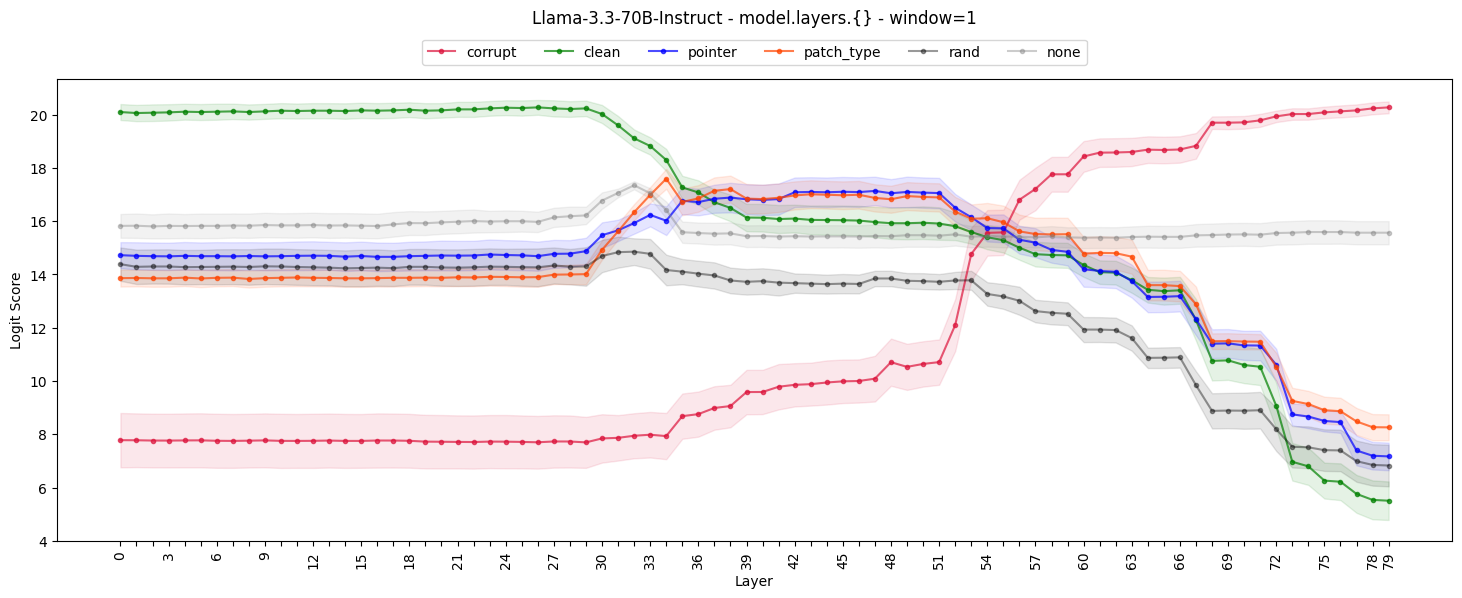

In [71]:
from matplotlib import pyplot as plt

##############################################
METRIC = "logit"
colors = {
    "corrupt": "crimson",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "#FF4500",
    "rand": "black",
    "none": "gray",
}
##############################################

all_scores = {obj_type: [] for obj_type in colors.keys()}
x_keys = list(patching_results[0].results.keys())
x_keys = [".".join(key.split(".")[2:]) for key in x_keys]

def get_tick_labels(ticks, step=5):
    return [
        tick if (i % step == 0 or i == len(ticks) - 1) else ""
        for i, tick in enumerate(ticks)
    ]

for run in patching_results:
    run_score = {obj_type: [] for obj_type in all_scores.keys()}
    for layer_idx, result in run.results.items():
        track = result.objs
        for obj_type in run_score.keys():
            run_score[obj_type].append(
                getattr(track[obj_type].pred, METRIC)
            )
    for obj_type in all_scores.keys():
        all_scores[obj_type].append(run_score[obj_type])

for obj_type in all_scores.keys():
    all_scores[obj_type] = torch.tensor(all_scores[obj_type])

plt.figure(figsize=(18, 6))
for key in all_scores:
    plt.plot(
        x_keys,
        all_scores[key].mean(dim=0).numpy(),
        label=key,
        marker="o",
        markersize=3,
        color=colors[key],
        alpha=0.7 if key not in ["none", "rand"] else 0.4,
    )
    std_err = all_scores[key].std(dim=0).numpy() / (N_RUNS ** 0.5)
    plt.fill_between(
        x_keys,
        all_scores[key].mean(dim=0).numpy() - std_err,
        all_scores[key].mean(dim=0).numpy() + std_err,
        alpha=0.1,
        color=colors[key],
    )

plt.xticks(x_keys, labels=get_tick_labels(x_keys, step=3), rotation=90)
plt.xlabel("Layer")
plt.ylabel(f"{METRIC.capitalize()} Score")
plt.title(f"{model_key.split('/')[-1]} - {module_name_format} - window={WINDOW_SPEC[module_name_format]}", pad=40)

plt.legend(ncols=len(all_scores), loc="upper center", bbox_to_anchor=(0.5, 1.10))

plt.show()

## Testing with Synthetic Entities

In [ ]:
from src.selection.data import SelectionSample, get_random_sample

sample = get_random_sample(
    people_by_category = people_by_category,
    mt = mt,
    n_distractors=5,
    get_alt_obj=True,
    category="actor",
    # obj_idx=3,
    filter_by_lm_prediction=True
)
print(sample)
sample.prediction

In [ ]:
from src.functional import generate_with_patch

synth_entity = "Ali Rezaei"
# synth_entity = "Takeshi Yamamoto"

prompts = [
    "{} is by profession a",
]

for prompt in prompts:
    gen = generate_with_patch(
        mt = mt,
        inputs = prompt.format(synth_entity),
        n_gen_per_prompt=1,
        remove_prefix=True,
        do_sample=False,
    )[0]
    print(f"{prompt.format(synth_entity)} >> {gen}")

In [ ]:
sample.options[sample.obj_idx] = synth_entity
print(sample.prompt)

In [ ]:
generate_with_patch(
    mt = mt,
    inputs = sample.prompt,
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)[0]

## Get subspace

### Load the cache and save the basis directions

In [15]:
# selection_dir = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR, "selection", mt.name.split("/")[-1], "profession"
# )
# cached_states_dir = cache_dir = os.path.join(selection_dir, "cached_states")


cached_states_dir = "/disk/u/arnab/Codes/Projects/retrieval/results/selection/Llama-3.3-70B-Instruct/profession/cached_states/last_token/Llama-3.3-70B-Instruct"
len(os.listdir(cached_states_dir))

12000

In [16]:
import numpy as np

sample_states = np.load(
    os.path.join(
        "/disk/u/arnab/Codes/Projects/retrieval/results/selection/Llama-3.3-70B-Instruct/profession/cached_states/last_token/Llama-3.3-70B-Instruct/sample_00001.npz"
    ),
    allow_pickle=True,
)
sample_states.files

['sample', 'states']

In [17]:
sample_states["states"].item().keys()

dict_keys(['model.embed_tokens_<>_-1', 'model.layers.0_<>_-1', 'model.layers.1_<>_-1', 'model.layers.2_<>_-1', 'model.layers.3_<>_-1', 'model.layers.4_<>_-1', 'model.layers.5_<>_-1', 'model.layers.6_<>_-1', 'model.layers.7_<>_-1', 'model.layers.8_<>_-1', 'model.layers.9_<>_-1', 'model.layers.10_<>_-1', 'model.layers.11_<>_-1', 'model.layers.12_<>_-1', 'model.layers.13_<>_-1', 'model.layers.14_<>_-1', 'model.layers.15_<>_-1', 'model.layers.16_<>_-1', 'model.layers.17_<>_-1', 'model.layers.18_<>_-1', 'model.layers.19_<>_-1', 'model.layers.20_<>_-1', 'model.layers.21_<>_-1', 'model.layers.22_<>_-1', 'model.layers.23_<>_-1', 'model.layers.24_<>_-1', 'model.layers.25_<>_-1', 'model.layers.26_<>_-1', 'model.layers.27_<>_-1', 'model.layers.28_<>_-1', 'model.layers.29_<>_-1', 'model.layers.30_<>_-1', 'model.layers.31_<>_-1', 'model.layers.32_<>_-1', 'model.layers.33_<>_-1', 'model.layers.34_<>_-1', 'model.layers.35_<>_-1', 'model.layers.36_<>_-1', 'model.layers.37_<>_-1', 'model.layers.38_<>_-

In [18]:
device_map = get_device_map(mt.name, 80, n_gpus=8)

def module_to_device(module_name):
    for key in device_map:
        if module_name.startswith(key):
            return f"cuda:{device_map[key]}"
    return "cpu"

module_to_device(mt.mlp_module_name_format.format(20))

'cuda:2'

In [19]:
import numpy as np

# LIMIT = 15
LIMIT = len(os.listdir(cached_states_dir))

cached_states = {}

for idx, file_name in enumerate(os.listdir(cached_states_dir)[:LIMIT]):
    sample_states = np.load(
        os.path.join(cached_states_dir, file_name), allow_pickle=True
    )
    states = {}
    for key, value in sample_states["states"].item().items():
        layer_idx, token_idx = key.split("_<>_")
        device = module_to_device(layer_idx)
        states[layer_idx] = torch.Tensor(value).to(mt.dtype).to(device)

    for layer_idx in states:
        if layer_idx not in cached_states:
            cached_states[layer_idx] = []
        cached_states[layer_idx].append(states[layer_idx])

    if (idx + 1) % 1000 == 0:
        logger.info(
            f"Processed {idx+1}/{LIMIT} files... ({(idx+1) / LIMIT * 100:.2f}%)"
        )

cached_states = {
    layer_name: torch.stack(cached_states[layer_name], dim=0)
    .to(mt.dtype)
    .to(module_to_device(layer_name))
    for layer_name in cached_states
}

free_gpu_cache()

2025-07-20 13:42:03 __main__ INFO     Processed 1000/12000 files... (8.33%)
2025-07-20 13:42:56 __main__ INFO     Processed 2000/12000 files... (16.67%)
2025-07-20 13:43:47 __main__ INFO     Processed 3000/12000 files... (25.00%)
2025-07-20 13:44:37 __main__ INFO     Processed 4000/12000 files... (33.33%)
2025-07-20 13:45:28 __main__ INFO     Processed 5000/12000 files... (41.67%)
2025-07-20 13:46:19 __main__ INFO     Processed 6000/12000 files... (50.00%)
2025-07-20 13:47:10 __main__ INFO     Processed 7000/12000 files... (58.33%)
2025-07-20 13:48:02 __main__ INFO     Processed 8000/12000 files... (66.67%)
2025-07-20 13:48:55 __main__ INFO     Processed 9000/12000 files... (75.00%)
2025-07-20 13:49:47 __main__ INFO     Processed 10000/12000 files... (83.33%)
2025-07-20 13:50:38 __main__ INFO     Processed 11000/12000 files... (91.67%)
2025-07-20 13:51:32 __main__ INFO     Processed 12000/12000 files... (100.00%)


In [20]:
for key in cached_states:
    print(f"{key}: {cached_states[key].device}, {cached_states[key].shape}")

model.embed_tokens: cuda:7, torch.Size([12000, 8192])
model.layers.0: cuda:0, torch.Size([12000, 8192])
model.layers.1: cuda:1, torch.Size([12000, 8192])
model.layers.2: cuda:2, torch.Size([12000, 8192])
model.layers.3: cuda:3, torch.Size([12000, 8192])
model.layers.4: cuda:4, torch.Size([12000, 8192])
model.layers.5: cuda:5, torch.Size([12000, 8192])
model.layers.6: cuda:6, torch.Size([12000, 8192])
model.layers.7: cuda:7, torch.Size([12000, 8192])
model.layers.8: cuda:0, torch.Size([12000, 8192])
model.layers.9: cuda:1, torch.Size([12000, 8192])
model.layers.10: cuda:1, torch.Size([12000, 8192])
model.layers.11: cuda:1, torch.Size([12000, 8192])
model.layers.12: cuda:1, torch.Size([12000, 8192])
model.layers.13: cuda:1, torch.Size([12000, 8192])
model.layers.14: cuda:1, torch.Size([12000, 8192])
model.layers.15: cuda:1, torch.Size([12000, 8192])
model.layers.16: cuda:1, torch.Size([12000, 8192])
model.layers.17: cuda:1, torch.Size([12000, 8192])
model.layers.18: cuda:1, torch.Size([1

In [21]:
import os

from src.utils.typing import SVD

basis_save_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, "selection", mt.name.split("/")[-1], "profession", "pca_directions", "last_token")
os.makedirs(basis_save_path, exist_ok=True)

for layer_idx in cached_states:
    print(layer_idx)
    X = cached_states[layer_idx]
    X_centered = X - X.mean(dim=0, keepdim=True)
    svd = SVD.calculate(X_centered)
    basis_directions = svd.Vh.to(mt.dtype)
    with open(
        os.path.join(basis_save_path, f"{layer_idx}.pt"), "wb"
    ) as f:
        torch.save(basis_directions, f)

model.embed_tokens
model.layers.0
model.layers.1
model.layers.2
model.layers.3
model.layers.4
model.layers.5
model.layers.6
model.layers.7
model.layers.8
model.layers.9
model.layers.10
model.layers.11
model.layers.12
model.layers.13
model.layers.14
model.layers.15
model.layers.16
model.layers.17
model.layers.18
model.layers.19
model.layers.20
model.layers.21
model.layers.22
model.layers.23
model.layers.24
model.layers.25
model.layers.26
model.layers.27
model.layers.28
model.layers.29
model.layers.30
model.layers.31
model.layers.32
model.layers.33
model.layers.34
model.layers.35
model.layers.36
model.layers.37
model.layers.38
model.layers.39
model.layers.40
model.layers.41
model.layers.42
model.layers.43
model.layers.44
model.layers.45
model.layers.46
model.layers.47
model.layers.48
model.layers.49
model.layers.50
model.layers.51
model.layers.52
model.layers.53
model.layers.54
model.layers.55
model.layers.56
model.layers.57
model.layers.58
model.layers.59
model.layers.60
model.layers.61

In [ ]:
from src.utils.typing import SVD

basis_save_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, "selection", mt.name.split("/")[-1], "profession", "basis_directions", "last_token")
os.makedirs(basis_save_path, exist_ok=True)

for layer_idx in cached_states:
    print(layer_idx)
    svd = SVD.calculate(cached_states[layer_idx])
    basis_directions = svd.Vh.to(mt.dtype)
    with open(
        os.path.join(basis_save_path, f"{layer_idx}.pt"), "wb"
    ) as f:
        torch.save(basis_directions, f)

### Train Subspace

In [22]:
from src.functional import get_module_nnsight

def apply_patch_with_projection(
    mt,
    clean_prompts,
    patch_prompts,
    projections,
    token_idx = -1,
):
    
    with mt.trace() as tracer:

        # cache states for patching
        patch_hs = {}
        with tracer.invoke(patch_prompts):
            for layer_name in projections:
                module = get_module_nnsight(mt, layer_name)
                current_states = (
                    module.output
                    if ("mlp" in layer_name or layer_name == mt.embedder_name)
                    else module.output[0]
                )
                patch_hs[layer_name] = current_states[:, token_idx, :].clone()
        
        # apply the patch
        with tracer.invoke(clean_prompts):
            for layer_name in projections:
                module = get_module_nnsight(mt, layer_name)
                current_states = (
                    module.output
                    if ("mlp" in layer_name or layer_name == mt.embedder_name)
                    else module.output[0]
                )
                clean_h = current_states[:, token_idx, :].clone()
                # apply the projection
                patch_proj = torch.matmul(patch_hs[layer_name], projections[layer_name])
                clean_proj = torch.matmul(clean_h, projections[layer_name])
                current_states[:, token_idx, :] = clean_h - clean_proj + patch_proj
                # current_states[:, token_idx, :] = patch_hs[layer_name]
            
            # get the logits after the intervention
            logits = mt.lm_head.output[:, -1].save()

    return logits

In [23]:
basis_save_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, "selection", mt.name.split("/")[-1], "profession", "basis_directions", "last_token")

basis_directions = {}
layer_names = [
    mt.layer_name_format.format(layer_idx)
    for layer_idx in range(42, 50)
]

for layer_idx in layer_names:
    with open(os.path.join(basis_save_path, f"{layer_idx}.pt"), "rb") as f:
        basis_directions[layer_idx] = torch.load(f)
    print(layer_idx, basis_directions[layer_idx].shape, basis_directions[layer_idx].device)

model.layers.42 torch.Size([8192, 8192]) cuda:4
model.layers.43 torch.Size([8192, 8192]) cuda:4
model.layers.44 torch.Size([8192, 8192]) cuda:4


model.layers.45 torch.Size([8192, 8192]) cuda:4
model.layers.46 torch.Size([8192, 8192]) cuda:4
model.layers.47 torch.Size([8192, 8192]) cuda:4
model.layers.48 torch.Size([8192, 8192]) cuda:4
model.layers.49 torch.Size([8192, 8192]) cuda:4


In [ ]:
masks = {
    layer_name: torch.ones(
        mt.n_embd, dtype=mt.dtype, device=module_to_device(layer_name), requires_grad=True
    )
    for layer_name in basis_directions.keys()
}

projections = {}
for layer_idx in basis_directions.keys():
    mask = masks[layer_idx]
    basis_direction = basis_directions[layer_idx]
    masked_directions = basis_direction * mask[:, None]
    projections[layer_idx] = masked_directions.t() @ masked_directions

In [25]:
selection_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR, "selection", mt.name.split("/")[-1]
)
patching_path = os.path.join(selection_path, "patching_results", "last_token")

with open(os.path.join(patching_path, "patching_results.json"), "r") as f:
    patching_results_ld = json.load(f)

clean_samples = []
patch_samples = []

for run in patching_results_ld:
    clean_samples.append(SelectionSample.from_dict(run["clean_sample"]))
    patch_samples.append(SelectionSample.from_dict(run["patch_sample"]))

len(clean_samples), len(patch_samples)

(100, 100)

In [26]:
from typing import Literal
from src.selection.utils import get_first_token_id

batch_size = 4

target_obj: Literal["pointer", "patch_type"] = "pointer"

targets = []
patch_prompts = []
clean_prompts = []

for clean_sample, patch_sample in zip(clean_samples[:batch_size], patch_samples[:batch_size]):
    objs = {
        "pointer": clean_sample.options[patch_sample.obj_idx],
        "patch_type": patch_sample.metadata["alt_obj"][0]
    }
    print(patch_sample)
    print(clean_sample)
    print(objs)

    print("-" * 50)

    targets.append(get_first_token_id(objs[target_obj], mt.tokenizer, prefix=" "))
    patch_prompts.append(patch_sample.prompt)
    clean_prompts.append(clean_sample.prompt)

Gervonta Davis -> Caleb Plant (0): ('Caleb Plant', 'Scarlett Johansson', 'Glenn Greenwald', 'Shane Lowry', 'Jim Carrey', 'Simona Halep')
Ridley Scott -> Tim Burton (3): ('Giannis Antetokounmpo', 'Ryan Garcia', 'Jordan Spieth', 'Tim Burton', 'Bret Baier', 'Maria Grazia Chiuri')
{'pointer': 'Giannis Antetokounmpo', 'patch_type': 'Ryan Garcia'}
--------------------------------------------------
Christopher Nolan -> Paul Thomas Anderson (4): ('Stella McCartney', 'Richard Branson', 'Bukayo Saka', 'Peter Baker', 'Paul Thomas Anderson', 'Joel Embiid')
Anthony Joshua -> Oleksandr Usyk (0): ('Oleksandr Usyk', 'Kevin Hart', 'James Cameron', 'Nikola Jokić', 'Nora Roberts', 'Brad Pitt')
{'pointer': 'Nora Roberts', 'patch_type': 'James Cameron'}
--------------------------------------------------
Stephen King -> J.K. Rowling (1): ('Bill Burr', 'J.K. Rowling', 'Robert Lewandowski', 'Nancy Pelosi', 'Elena Rybakina', 'Christian Louboutin')
Michael Kors -> Vera Wang (0): ('Vera Wang', 'Sebastian Manisca

In [27]:
from src.tokens import prepare_input

for tok in targets:
    print(f'{tok} >> "{mt.tokenizer.decode(tok)}"')

clean_tokenized = prepare_input(prompts=clean_prompts, tokenizer = mt)
patch_tokenized = prepare_input(prompts=patch_prompts, tokenizer = mt)

clean_tokenized.input_ids.shape, patch_tokenized.input_ids.shape

15754 >> " Gi"
73645 >> " Nora"
44609 >> " Sebastian"
17478 >> " Brad"


(torch.Size([4, 49]), torch.Size([4, 47]))

In [28]:
logits = apply_patch_with_projection(
    mt=mt,
    clean_prompts=clean_prompts,
    patch_prompts=patch_prompts,
    projections=projections,
    token_idx=-1,
)   

logits.shape

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


torch.Size([4, 128256])

In [29]:
from src.functional import interpret_logits
for logit in logits:
    pred = interpret_logits(tokenizer=mt, logits = logit)
    print([f"{str(p)}" for p in pred])

['" Gi"[15754] (p=0.539, logit=18.875)', '" Bret"[72777] (p=0.073, logit=16.875)', '" Ridley"[93401] (p=0.064, logit=16.750)', '" The"[578] (p=0.064, logit=16.750)', '" None"[2290] (p=0.057, logit=16.625)']
['" James"[7957] (p=0.566, logit=19.375)', '" The"[578] (p=0.235, logit=18.500)', '" Anthony"[21353] (p=0.067, logit=17.250)', '" Nikola"[97415] (p=0.025, logit=16.250)', '" A"[362] (p=0.014, logit=15.688)']
['" Vera"[68200] (p=0.316, logit=17.625)', '" J"[622] (p=0.217, logit=17.250)', '" Michael"[8096] (p=0.132, logit=16.750)', '" The"[578] (p=0.116, logit=16.625)', '" "[220] (p=0.018, logit=14.750)']
['" Christian"[9052] (p=0.287, logit=18.250)', '" Anne"[29026] (p=0.254, logit=18.125)', '" The"[578] (p=0.105, logit=17.250)', '" Lester"[83758] (p=0.082, logit=17.000)', '" Journal"[10139] (p=0.072, logit=16.875)']


In [30]:
target_logits = [logit[tok] for logit, tok in zip(logits, targets)]

In [31]:
torch.stack(target_logits).mean()

tensor(14.3750, device='cuda:7', dtype=torch.bfloat16, grad_fn=<MeanBackward0>)

In [32]:
from torch.optim import Adam


def get_optimal_projection(
    mt: ModelandTokenizer,
    clean_prompts: list[str],
    patch_prompts: list[str],
    target_tokens: list[int],
    basis_directions: dict[str, torch.Tensor],
    learning_rate: float = 1e-2,
    n_epochs: int = 5,
    lamb=1e-5,
    batch_size: int = 4,
):
    masks = {
        layer_name: torch.ones(
            mt.n_embd,
            dtype=mt.dtype,
            device=module_to_device(layer_name),
            requires_grad=True,
        )
        for layer_name in basis_directions.keys()
    }
    optimizer = Adam(masks.values(), lr=learning_rate)

    losses = []
    for epoch in range(n_epochs):
        epoch_loss = 0
        for batch_idx, batch_st in enumerate(range(0, len(clean_prompts), batch_size)):
            batch_clean = clean_prompts[batch_st : batch_st + batch_size]
            batch_patch = patch_prompts[batch_st : batch_st + batch_size]
            batch_targets = target_tokens[batch_st : batch_st + batch_size]

            clean_tokenized = prepare_input(prompts=batch_clean, tokenizer=mt)
            patch_tokenized = prepare_input(prompts=batch_patch, tokenizer=mt)

            projections = {}
            for layer_name in basis_directions.keys():
                mask = masks[layer_name]
                basis_direction = basis_directions[layer_name]
                masked_directions = basis_direction * mask[:, None]
                # V directions are row-wise
                projections[layer_name] = masked_directions.t() @ masked_directions

            logits = apply_patch_with_projection(
                mt=mt,
                clean_prompts=clean_tokenized,
                patch_prompts=patch_tokenized,
                projections=projections,
                token_idx=-1,
            )

            # calculate loss
            target_logits = [logit[tok] for logit, tok in zip(logits, batch_targets)]
            # print(target_logits)
            target_loss = -torch.stack(target_logits).mean()  # need this to go up

            mask_l1_loss = None
            for mask in masks.values():
                if mask_l1_loss is None:
                    mask_l1_loss = lamb * mask.norm(p=1)
                else:
                    mask_l1_loss += lamb * mask.norm(p=1).to(mask_l1_loss.device)

            loss = target_loss + mask_l1_loss.to(target_loss.device)
            logger.debug(f"{batch_idx} >> {target_loss} + {mask_l1_loss} = {loss}")

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # clamp the masks to [0, 1] after optimization step
            with torch.no_grad():
                for mask in masks.values():
                    mask.clamp_(0, 1)

            epoch_loss += loss.item()
            losses.append(loss.item())

        num_batches = (len(clean_prompts) + batch_size - 1) // batch_size  # ceiling division
        logger.debug(
            f"Epoch {epoch + 1}/{n_epochs}, Loss: {epoch_loss / num_batches}"
        )

    # build projections
    final_projections = {}
    metadata = {
        "losses": losses,
        "masks": {k: v.detach().clone() for k, v in masks.items()},
    }
    for layer_name in basis_directions.keys():
        mask = masks[layer_name]
        basis_direction = basis_directions[layer_name]
        masked_directions = basis_direction * mask[:, None]
        # V directions are row-wise
        final_projections[layer_name] = masked_directions.t() @ masked_directions

    return final_projections, metadata

In [33]:
target_obj: Literal["pointer", "patch_type", "corrupt"] = "patch_type"

targets = []
patch_prompts = []
clean_prompts = []

for clean_sample, patch_sample in zip(clean_samples, patch_samples):
    objs = {
        "pointer": clean_sample.options[patch_sample.obj_idx],
        "patch_type": patch_sample.metadata["alt_obj"][0],
        "corrupt": patch_sample.obj,
    }
    # print(patch_sample)
    # print(clean_sample)
    # print(objs)
    # print("-" * 50)

    targets.append(get_first_token_id(objs[target_obj], mt.tokenizer, prefix=" "))
    patch_prompts.append(patch_sample.prompt)
    clean_prompts.append(clean_sample.prompt)

len(targets), len(patch_prompts), len(clean_prompts)

(100, 100, 100)

In [34]:
projections, metadata = get_optimal_projection(
    mt=mt,
    clean_prompts=clean_prompts,
    patch_prompts=patch_prompts,
    target_tokens=targets,
    basis_directions=basis_directions,
    lamb=1e-3,
    learning_rate=1e-2,
)

2025-07-20 14:51:01 __main__ DEBUG    0 >> -17.0 + 65.5 = 48.5
2025-07-20 14:51:03 __main__ DEBUG    1 >> -17.5 + 64.5 = 47.0
2025-07-20 14:51:04 __main__ DEBUG    2 >> -15.0625 + 64.0 = 49.0
2025-07-20 14:51:05 __main__ DEBUG    3 >> -15.875 + 63.5 = 47.5
2025-07-20 14:51:06 __main__ DEBUG    4 >> -16.0 + 62.5 = 46.5
2025-07-20 14:51:07 __main__ DEBUG    5 >> -16.75 + 61.75 = 45.0
2025-07-20 14:51:09 __main__ DEBUG    6 >> -17.25 + 60.75 = 43.5
2025-07-20 14:51:10 __main__ DEBUG    7 >> -16.25 + 60.5 = 44.25
2025-07-20 14:51:11 __main__ DEBUG    8 >> -16.25 + 59.75 = 43.5
2025-07-20 14:51:12 __main__ DEBUG    9 >> -16.375 + 58.5 = 42.0
2025-07-20 14:51:13 __main__ DEBUG    10 >> -17.875 + 58.0 = 40.0
2025-07-20 14:51:14 __main__ DEBUG    11 >> -17.0 + 57.0 = 40.0
2025-07-20 14:51:16 __main__ DEBUG    12 >> -15.6875 + 56.5 = 40.75
2025-07-20 14:51:17 __main__ DEBUG    13 >> -17.75 + 56.0 = 38.25
2025-07-20 14:51:18 __main__ DEBUG    14 >> -17.375 + 55.0 = 37.5
2025-07-20 14:51:19 __mai

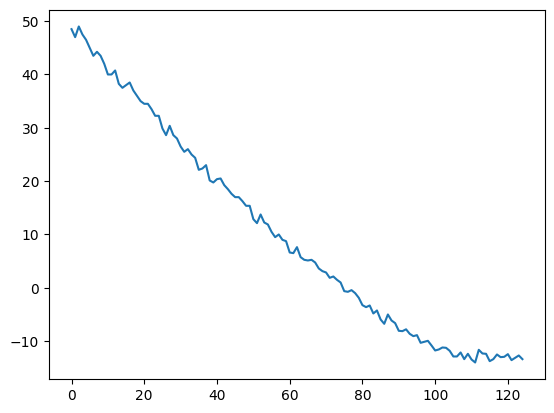

In [37]:
from matplotlib import pyplot as plt 
plt.plot(metadata["losses"])
plt.show()